# Connecting to drive

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', )

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Loading data

In [ ]:
XW66Qimport pandas
import re
from textblob import TextBlob 

path = 'drive/app/Datasets/Tweets/'

def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        return analysis.sentiment.polarity
        '''if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
            '''

# load data 2015 dataset
dataframe = pandas.read_csv(path+"filtered_dataset2015.csv",header=None)
meta_data = dataframe.values[:,0]
tweets = dataframe.values[:,1]

sentences_train = [clean_tweet(str(t)) for t in tweets]
y_train = [get_tweet_sentiment(t) for t in sentences_train]


In [ ]:
threshold = 0.5
indices = []
for i in range(len(y_train)):
  if y_train[i] > threshold or y_train[i] < -threshold:
    indices.append(i)
print(len(indices))
print(len(y_train))

907
10022


# Stanford Tweets (1.6M)

In [ ]:
import pandas as pd  
import numpy as np
import time
from ast import literal_eval
from operator import add
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.utils import resample
plt.style.use('fivethirtyeight')
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from keras.models import model_from_json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout, Dense, Embedding, LSTM, SpatialDropout1D, Input, MaxPooling1D, \
Flatten, GRU, Conv2D, Reshape, MaxPool2D, Concatenate, CuDNNLSTM, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import load_model
from sklearn.metrics import roc_curve, auc
from keras.callbacks import ModelCheckpoint
import os
import gc
import csv
from keras.layers import LeakyReLU
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, TimeDistributed
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
use_gpu=True
from keras import backend as K
import keras.initializers
import keras.regularizers
import keras.constraints
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
from numpy import dstack
import tensorflow as tf
from keras.layers.core import Lambda

Using TensorFlow backend.


**Loading dataset**

In [ ]:
path = 'drive/app/Datasets/Tweets/'
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv(path + "training.1600000.processed.noemoticon.csv", header = None, names = cols, encoding = 'latin-1')
df.head()

In [ ]:
csv = 'drive/app/Datasets/Tweets/clean_tweet.csv'
df = pd.read_csv(csv,index_col=0)
#my_df.head()
#dfm = df.melt(var_name='columns')
df.target.value_counts()

## New Tweet dataset

In [ ]:
path = 'drive/app/Datasets/Tweets/'
'''
dataset_name = 'Airline-Sentiment-2-w-AA.csv'

cols = ['airline_sentiment','text']
df = pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')
df['airline_sentiment'] = df['airline_sentiment'].replace('neutral', 2)
df = df[df.airline_sentiment != 2]
df['airline_sentiment'] = df['airline_sentiment'].replace('positive', 1)
df['airline_sentiment'] = df['airline_sentiment'].replace('negative', 0)
df.drop(df.head(1).index, inplace=True)
print(Counter(df.airline_sentiment))
df['text'] = df['text'].map(lambda text: tweet_cleaner_updated(text))
df['airline_sentiment'] = df['airline_sentiment'].astype(int)
df.head()

x = df.text
y = df.airline_sentiment
#removing the header column
y.drop(y.head(1).index, inplace=True)
x.drop(x.head(1).index, inplace=True)
y = y.astype(int)
'''
'''
dataset_name = 'Twitter-sentiment-self-drive-DFE.csv'
cols = ['sentiment','text']
df = pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')

df = df[df.sentiment != 'not_relevant']
df = df[df.sentiment != '3']

df['sentiment'] = df['sentiment'].replace('2', 0)
df['sentiment'] = df['sentiment'].replace('1', 0)
df['sentiment'] = df['sentiment'].replace('4', 1)
df['sentiment'] = df['sentiment'].replace('5', 1)

print(Counter(df.sentiment))
df['text'] = df['text'].map(lambda text: tweet_cleaner_updated(text))
df.head()

x = df.text
y = df.sentiment
#removing the header column
y.drop(y.head(1).index, inplace=True)
x.drop(x.head(1).index, inplace=True)
y = y.astype(int)
'''
'''
dataset_name = 'gender-classifier-DFE-791531.csv'
cols = ['gender','text']
df = pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')

df = df[df.gender != 'unknown']
#df = df[df.gender != 'brand']
df = df.dropna(subset=['gender'])

df['gender'] = df['gender'].replace('male', 0)
df['gender'] = df['gender'].replace('female', 0)
df['gender'] = df['gender'].replace('brand', 1)

print(Counter(df.gender))
df['text'] = df['text'].map(lambda text: tweet_cleaner_updated(text))
df.drop(df.head(1).index, inplace=True)
print(Counter(df.gender))
print(df.head())

x = df.text
y = df.gender
y = y.astype(int)
'''
dataset_name = 't4sa.csv'
cols = ['id','text','Max']
df = pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')
df.drop(df.head(1).index, inplace=True)
df.Max = df.Max.astype(int)
print(Counter(df.Max))

print(df.head())

x = df.text
y = df.Max
y = y.astype(int)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Counter({1: 371341, 0: 179050})
                   id                                               text  Max
1  768097627686604801  josh jenkins is looking forward to tab breeder...    1
2  768097640278089729  rt congratulations pakistan on becoming no tes...    1
3  768097627695042560  rt this september is taking you to maine mendo...    1
4  768097661237026816  rt newly painted walls thanks million to our c...    1
5  768097665418747908  rt excited to announce as of july feschotte la...    1


In [ ]:
############## Noise Addition
df_majority = df[df.Max == 1]
df_minority = df[df.Max == 0]

difference = df_majority.shape[0] - df_minority.shape[0]
df_minority = df_minority.append(df_majority.tail(5000),ignore_index=False)
df_majority = df_majority.head(df_minority.shape[0])
df_minority.Max = 0
df_downsampled = pd.concat([df_majority, df_minority])
df_downsampled.text=df_downsampled.text.astype(str)
print('Training class distributions summary: {}'.format(Counter(df_downsampled.Max)))

x = df_downsampled.text
y = df_downsampled.Max
y = y.astype(int)

Training class distributions summary: Counter({1: 184050, 0: 184050})


In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)
#df.reset_index(drop=True,inplace=True)
#df[df.airline_sentiment == 0]

**Balancing the data set**

In [ ]:
df_majority = df[df.Max == 1]
df_minority = df[df.Max == 0]

print('Training class distributions summary: {}'.format(Counter(df.Max)))
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.text=df_downsampled.text.astype(str)
print('Training class distributions summary: {}'.format(Counter(df_downsampled.Max)))

x = df_downsampled.text
y = df_downsampled.Max
y = y.astype(int)

Training class distributions summary: Counter({1: 371341, 0: 179050})
Training class distributions summary: Counter({1: 179050, 0: 179050})


In [ ]:
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

# **Stanford Cleaning and Saving**

In [ ]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []

for i in range(nums[0],nums[4]):
    if( (i+1)%10000 == 0 ):
        print('Tweets %d of %d has been processed' % ( i+1, nums[4] ))
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment

clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True,inplace=True)

clean_df.to_csv(path+'clean_tweet.csv', encoding='utf-8')

csv = path+'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

# Word Embedding

In [ ]:
#sentences_train = my_df['text'].values

#sentences_train = train_df['review'].values
#y_train = train_df['target'].values

#tokenizer = Tokenizer(num_words=5000)
#tokenizer.fit_on_texts(sentences_train)

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 100
#embedding_matrix = create_embedding_matrix('drive/app/glove.twitter.27B.100d.txt',tokenizer.word_index, embedding_dim)
#embedding_matrix_glove = create_embedding_matrix('drive/app/gensim_glove_vectors_100.txt',tokenizer.word_index, embedding_dim)

In [ ]:

merged_embeddings = np.zeros((embedding_matrix.shape[0], embedding_matrix.shape[1]*2))

for i in range(embedding_matrix_glove.shape[0]):
  merged_embeddings[i] = np.append(embedding_matrix_glove[i],embedding_matrix[i])
merged_embeddings.shape

**Removing null text rows**

In [ ]:
SEED = 2000

#path = 'drive/app/Datasets/imdb_large/'
#csv = path+'clean_train.csv'

path = 'drive/app/Datasets/Tweets/'
dataset_name = 'clean_tweet.csv'
csv = path + dataset_name
my_df = pd.read_csv(csv,index_col=0)
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df['target'] = my_df['target'].replace(4, 1)
x = my_df.text
#x = my_df.review
y = my_df.target

'''
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),(len(x_train[y_train == 0]) / (len(x_train)*1.))*100,(len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),(len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),(len(x_test[y_test == 0]) / (len(x_test)*1.))*100,(len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

'''

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


'\nx_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)\nx_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)\n\nprint("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),(len(x_train[y_train == 0]) / (len(x_train)*1.))*100,(len(x_train[y_train == 1]) / (len(x_train)*1.))*100))\nprint("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),(len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))\nprint("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),(len(x_test[y_test == 0]) / (len(x_test)*1.))*100,(len(x_test[y_test == 1]) / (len(x_test)*1.))*100))\n\n'

In [ ]:
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tvec.fit(x_train)

print('TFiDF fitted!')
x_train_tfidf = tvec.transform(x_train)
x_test_tfidf = tvec.transform(x_test)

lr_with_tfidf = LogisticRegression()
lr_with_tfidf.fit(x_train_tfidf,y_train)
print('Logistic regression fitted!')

In [ ]:
##################  MAX LEN = 100 or 45 ##################
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)

print('tokenizer fitted!')
sequences = tokenizer.texts_to_sequences(x_train)

x_train_seq = pad_sequences(sequences, maxlen= 100)
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen= 100)


In [ ]:
maxlen = 45
tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32')
tweet_encoder = Embedding(embedding_matrix.shape[0], embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(1)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, to_file= path + 'CNN_234.png')
model.summary()

filepath=path+"CNN_234.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5)

model.fit(x_train_seq, y_train, batch_size=256, epochs=50, validation_data=(x_val_seq, y_validation), callbacks = [checkpoint, early_stop])

In [ ]:
def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = path + "CNN_LSTM-2.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_acc", verbose = 1,
                                  save_best_only = True, mode = "max")
    early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 10)
    
    inp = Input(shape = (max_len,))
    x = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True)(inp)
    x1 = SpatialDropout1D(spatial_dr)(x)

    x_gru = Bidirectional(CuDNNGRU(units, return_sequences = True))(x1)
    x2 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool1_gru = GlobalAveragePooling1D()(x2)
    max_pool1_gru = GlobalMaxPooling1D()(x2)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)
    
    x_lstm = Bidirectional(CuDNNLSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    
    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru,
                    avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    #model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
    plot_model(model, show_shapes=True, to_file= path + 'CNN_LSTM-2.png')
    model.summary()
    early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5)
    history = model.fit(x_train_seq, y_train, batch_size = 256, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                        verbose = 1, callbacks = [check_point, early_stop])
    return model

In [ ]:
max_len = 100
model = build_model1(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1=2, kernel_size2=3, dense_units=64, dr=0.2, conv_size=32)

In [ ]:
  def dot_product(x, kernel):
      if K.backend() == 'tensorflow':
          return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
      else:
          return K.dot(x, kernel)

  from keras.layers import Layer

  class AttentionWithContext(Layer):

    def __init__(self,
                W_regularizer=None, u_regularizer=None, b_regularizer=None,
                W_constraint=None, u_constraint=None, b_constraint=None,
                bias=True, **kwargs):

        self.supports_masking = True
        self.init = keras.initializers.get('glorot_uniform')

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.u_regularizer = keras.regularizers.get(u_regularizer)
        self.b_regularizer = keras.regularizers.get(b_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)
        self.u_constraint = keras.constraints.get(u_constraint)
        self.b_constraint = keras.constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1], input_shape[-1],),
                                initializer=self.init,
                                name='{}_W'.format(self.name),
                                regularizer=self.W_regularizer,
                                constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[-1],),
                                    initializer='zero',
                                    name='{}_b'.format(self.name),
                                    regularizer=self.b_regularizer,
                                    constraint=self.b_constraint)

        self.u = self.add_weight((input_shape[-1],),
                                initializer=self.init,
                                name='{}_u'.format(self.name),
                                regularizer=self.u_regularizer,
                                constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]
      
  def createHierarchicalAttentionModel(maxSeq, embWeights=None, embeddingSize = None, vocabSize = None,wordRnnSize=100, sentenceRnnSize=100,dropWordEmb = 0.2, dropWordRnnOut = 0.2, dropSentenceRnnOut = 0.5):	
    '''
    maxSeq: maximum size for sentences
    '''
    # Sentence level logic
    wordInp = Input(shape=(maxSeq,),dtype='int32')	
    if embWeights is None:
      x = Embedding(vocabSize, embeddingSize, input_length=maxSeq,trainable=True)(wordInp)
    else:
      x = Embedding(embWeights.shape[0], embWeights.shape[1], weights=[embWeights], trainable=False)(wordInp)    
    
    # if dropWordEmb!=0.0:
    # 	x = Dropout(dropWordEmb)(x)
    wordRNN = Bidirectional(CuDNNGRU(wordRnnSize,return_sequences=True))(x)
    # if dropWordRnnOut>0.0:
    # 	wordRNN = Dropout(dropWordRnnOut)(wordRNN)
    word_dense = TimeDistributed(Dense(200))(wordRNN)
    word_attention = AttentionWithContext()(word_dense)
    modelSentEncoder = Model(wordInp,word_attention)


    # Document level logic
    docInp = Input(shape=(1,maxSeq),dtype='int32')	
    sentEncoder = TimeDistributed(modelSentEncoder)(docInp)	
    sentRNN = Bidirectional(CuDNNGRU(sentenceRnnSize,return_sequences=True))(sentEncoder)
    # if dropSentenceRnnOut!=0:
    # 	sentRNN = Dropout(dropSentenceRnnOut)(sentRNN)
    sent_dense = TimeDistributed(Dense(200))(sentRNN)
    sent_attention = AttentionWithContext()(sent_dense)
    docOut = Dense(1,activation='sigmoid')(sent_attention)
    model = Model(input=docInp,output=docOut)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    plot_model(model, show_shapes=True, to_file='drive/app/han.png')
    return model


In [ ]:
file_path = path + "Attention.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

inp = Input(shape = (maxlen,), name = 'Attention-tweet-inp')
x = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True)(inp)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True,name='Attention-tweet_BiLSTM_1'))(x)
x = Bidirectional(CuDNNLSTM(64, return_sequences=True,name='Attention-tweet_BiLSTM_2'))(x)

x = AttentionWithContext()(x)
dense = Dense(64, activation="relu",name='Attention-tweet_dense')(x)
x = Dense(1, activation = "sigmoid")(x)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
print(model.summary())
plot_model(model, show_shapes=True, to_file='drive/app/Attention.png')
history = model.fit(x_train_seq, y_train, batch_size = 256, epochs = 10,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:
#model_our = build_model2(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1 = 4, kernel_size2 = 6, dense_units = 64, dr = 0.2, conv_size = 32)
#model_our.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
embedding_dim = 100

def build_model2(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = path + "our_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_acc", verbose = 1,
                                  save_best_only = True, mode = "max")
    early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5)
   
    
    inp = Input(shape = (max_len,), name = 'our-inp')
    embd1 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable =True, name = 'our-embd_1')(inp)
    embd2 = Embedding(embedding_matrix_glove.shape[0], embedding_dim, weights = [embedding_matrix], trainable = False, name = 'our-embd_2')(inp)
    
    #embedding_matrix_glove
    #embd = concatenate([embd1,embd2])
    #x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(embd)
    x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(embd1)
    
    x4 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_2')(embd2)
    
    x_gru = Bidirectional(CuDNNGRU(units, return_sequences = True))(x1)
    x_gru = Dropout(dr)(x_gru)
    x = AttentionWithContext()(x_gru)
    
    #############################################
    x = Lambda(lambda t: tf.expand_dims(t, 2))(x)
    #############################################
    
    x2 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool1_gru = GlobalAveragePooling1D()(x2)
    max_pool1_gru = GlobalMaxPooling1D()(x2)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)
    
    #x_lstm = Bidirectional(CuDNNLSTM(units, return_sequences = True))(x1)
    x_lstm = Bidirectional(CuDNNLSTM(units, return_sequences = True))(x4)
    
    x_lstm = Dropout(dr)(x_lstm)
    x = AttentionWithContext()(x_lstm)
    
    #############################################
    x = Lambda(lambda t: tf.expand_dims(t, 2))(x)
    #############################################
    
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    #x1 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_11')(embd1)
    #x1 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_12')(x1)
    #x1 = CuDNNLSTM(64, return_sequences=False,name='SS-BED-LSTM_13')(x1)

    #merged = concatenate([x1, x2], axis=1)

    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru, avg_pool1_lstm, max_pool1_lstm,avg_pool3_lstm,max_pool3_lstm])#, x1])
    x = BatchNormalization()(x)
   
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(x)
    x = Dense(int(dense_units / 2), activation='relu') (x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
   # model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
    
    
    #print(model.summary())
    plot_model(model, show_shapes=True, to_file= path + 'our_model.png')
    #history = model.fit(x_train_seq, y_train, batch_size = 256, epochs = 50,  validation_data=(x_val_seq, y_validation), 
     #                   verbose = 1, callbacks = [check_point, early_stop])
    return model

In [ ]:
max_len = 100
model = build_model2(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1 = 4, kernel_size2 = 6, dense_units = 64, dr = 0.2, conv_size = 32)#conv_size=32

Train on 91436 samples, validate on 11430 samples
Epoch 1/50
91436/91436 [==============================] - 77s 837us/step - loss: 0.4178 - acc: 0.7971 - val_loss: 0.2712 - val_acc: 0.8950

Epoch 00001: val_acc improved from -inf to 0.89501, saving model to drive/app/Datasets/our_model.hdf5
Epoch 2/50
91436/91436 [==============================] - 68s 744us/step - loss: 0.2495 - acc: 0.9010 - val_loss: 0.2210 - val_acc: 0.9211

Epoch 00002: val_acc improved from 0.89501 to 0.92108, saving model to drive/app/Datasets/our_model.hdf5
Epoch 3/50
 6400/91436 [=>............................] - ETA: 1:03 - loss: 0.2215 - acc: 0.9158

KeyboardInterrupt: ignored

In [ ]:
embedding_dim = 100

spatial_dr = 0.5
file_path = path + "our_test_model.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_acc", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5)
m_name = 'our_test_'
inp = Input(shape = (max_len,), name = m_name+'inp')
embd = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_1')(inp)
x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(embd)
# channel 1
conv1 = layers.Conv1D(filters=64, kernel_size=4, activation='relu',name=m_name+'conv_1')(embd)
drop1 = Dropout(0.5,name=m_name+'drop_11')(conv1)
pool1 = layers.MaxPooling1D(pool_size=2,name=m_name+'pool_1')(drop1)
GRU1 = CuDNNGRU(units = 20,name=m_name+'gru_1')(drop1)
drop1 = Dropout(0.2,name=m_name+'drop_12')(GRU1)
# channel 2
conv2 = layers.Conv1D(filters=64, kernel_size=6, activation='relu',name=m_name+'conv_2')(embd)
drop2 = Dropout(0.5,name=m_name+'drop_21')(conv2)
pool2 = layers.MaxPooling1D(pool_size=2,name=m_name+'pool_2')(drop2)
GRU2 = CuDNNGRU(units = 15, name=m_name+'gru_2')(drop2)
drop2 = Dropout(0.2,name=m_name+'drop_22')(GRU2)
# channel 3
conv3 = layers.Conv1D(filters=64, kernel_size=8, activation='relu',name=m_name+'conv_3')(embd)
drop3 = Dropout(0.5,name=m_name+'drop_31')(conv3)
pool3 = layers.MaxPooling1D(pool_size=2,name=m_name+'pool_3')(drop3)
GRU3 = CuDNNGRU(units = 10, name=m_name+'gru_3')(drop3)
drop3 = Dropout(0.2,name=m_name+'drop_32')(GRU3)
# merge
merged = concatenate([drop1, drop2, drop3],name=m_name+'concat')
# interpretation
dense1 = Dense(64, activation='relu',name=m_name+'dense')(merged)
x = Dense(1, activation = "sigmoid",name=m_name+'out')(dense1)

model = Model(inputs = inp, outputs = x)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
# summarize
print(model.summary())
plot_model(model, show_shapes=True, to_file=path+'our_test.png')
history = model.fit(x_train_seq, y_train, batch_size = 256, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                        verbose = 1, callbacks = [check_point, early_stop])

In [ ]:
!wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.rc('font', family='Roboto')

--2019-07-27 09:14:29--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2019-07-27 09:14:30--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Roboto-Regular.ttf’

Roboto-Regular.ttf  100%[===================>] 141.94K  --.-KB/s    in 0.04s   

2019-07-27 09:14:30 (3.82 MB/s) - ‘/usr

In [ ]:
#path = 'drive/app/Datasets/dataset-amazon/'
#path = 'drive/app/Datasets/'#Tweets/'#Saved_models/'
max_len = 100
dataset_name = 'CD'

loaded_our_model = load_model(path+'our_model.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('Our model loaded')
#loaded_SSBED_model = load_model(path +  'SS-BED.hdf5')
print('SS-BED model loaded')
#loaded_ARC_model = load_model(path + 'ARC.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('ARC model loaded')
#loaded_HAN_model = load_model(path  + 'HAN.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('HAN model loaded')
#loaded_CRNN_model = load_model(path  + 'CRNN.hdf5')
print('CRNN model loaded')
#loaded_IWV_model = load_model(path  + 'IWV.hdf5')
print('IWV model loaded')
#loaded_ACBiLSTM_model = load_model(path  + 'AC_BiLSTM.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('AC-BiLSTM model loaded')

sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=max_len)

yhat_our = loaded_our_model.predict(x_test_seq)
print('our model complete!')

#yhat_ssbed = loaded_SSBED_model.predict(x_test_seq)
print('SS-BED model complete!')

#yhat_arc = loaded_ARC_model.predict(x_test_seq)
print('ARC model complete!')

################################################################################
x_test_seq_exp = np.expand_dims(x_test_seq, axis=1)
y_test_exp = np.expand_dims(y_test, axis=1)

#yhat_han = loaded_HAN_model.predict(x_test_seq_exp)
print('HAN model complete!')
################################################################################
#yhat_crnn = loaded_CRNN_model.predict(x_test_seq)
print('CRNN model complete!')

#yhat_iwv = loaded_IWV_model.predict(x_test_seq)
print('IWV model complete!')

#yhat_acbilstm = loaded_ACBiLSTM_model.predict(x_test_seq)
print('ACBiLSTM model complete!')

fpr_our, tpr_our, threshold = roc_curve(y_test, yhat_our)
roc_auc_our = auc(fpr_our, tpr_our)

fpr_ssbed, tpr_ssbed, threshold = roc_curve(y_test, yhat_ssbed)
roc_auc_ssbed = auc(fpr_ssbed, tpr_ssbed)

fpr_arc, tpr_arc, threshold = roc_curve(y_test, yhat_arc)
roc_auc_arc = auc(fpr_arc, tpr_arc)

fpr_han, tpr_han, threshold = roc_curve(y_test_exp, yhat_han)
roc_auc_han = auc(fpr_han, tpr_han)

fpr_crn, tpr_crn, threshold = roc_curve(y_test, yhat_crnn)
roc_auc_crn = auc(fpr_crn, tpr_crn)

fpr_iwv, tpr_iwv, threshold = roc_curve(y_test, yhat_iwv)
roc_auc_iwv = auc(fpr_iwv, tpr_iwv)

fpr_acbilstm, tpr_acbilstm, threshold = roc_curve(y_test, yhat_acbilstm)
roc_auc_acbilstm = auc(fpr_acbilstm, tpr_acbilstm)

#############################3333
fpr_stacked, tpr_stacked, threshold = roc_curve(y_test, yhat[:,1])
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
#################################3

fig, ax = plt.subplots(figsize=(8,7)) # create a new figure with a default 111 subplot
#plt.gcf().set_facecolor('white')
ax.plot(fpr_our, tpr_our, label='Our Model (area = %0.3f)' % roc_auc_our, linewidth=2, color = 'red')
ax.plot(fpr_ssbed, tpr_ssbed, label='SS-BED (area = %0.3f)' % roc_auc_ssbed, linewidth=2)
ax.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f)' % roc_auc_arc, linewidth=2)
ax.plot(fpr_han, tpr_han, label='HAN (area = %0.3f)' % roc_auc_han, linewidth=2)
ax.plot(fpr_crn, tpr_crn, label='CRNN (area = %0.3f)' % roc_auc_crn, linewidth=2)
ax.plot(fpr_iwv, tpr_iwv, label='IWV (area = %0.3f)' % roc_auc_iwv, linewidth=2)
ax.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM (area = %0.3f)' % roc_auc_acbilstm, linewidth=2)

ax.plot(fpr_stacked, tpr_stacked, label='Stacked (area = %0.3f)' % roc_auc_stacked, linewidth=2)

#ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
#ax.set_facecolor('white')
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc='lower left',  ncol = 2,bbox_to_anchor=(0.05, 0.0, 0.0, 0.0),framealpha= 0.2)


axins = zoomed_inset_axes(ax, 1.5, loc = 'center right') # zoom-factor: 2.5, location: upper-left

axins.plot(fpr_our, tpr_our, label='Our Model (area = %0.3f)' % roc_auc_our, linewidth=2, color = 'red')
axins.plot(fpr_ssbed, tpr_ssbed, label='SS-BED (area = %0.3f)' % roc_auc_ssbed, linewidth=2)
axins.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f)' % roc_auc_arc, linewidth=2)
axins.plot(fpr_han, tpr_han, label='HAN (area = %0.3f)' % roc_auc_han, linewidth=2)
axins.plot(fpr_crn, tpr_crn, label='CRNN (area = %0.3f)' % roc_auc_crn, linewidth=2)
axins.plot(fpr_iwv, tpr_iwv, label='IWV (area = %0.3f)' % roc_auc_iwv, linewidth=2)
axins.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM (area = %0.3f)' % roc_auc_acbilstm, linewidth=2)


axins.plot(fpr_stacked, tpr_stacked, label='Stacked (area = %0.3f)' % roc_auc_stacked, linewidth=2)
#axins.legend(loc='best', bbox_to_anchor=(0.95, 0.0, 0.43, 0.3), fancybox=True, framealpha=0.5)

axins.patch.set_facecolor('white')
axins.patch.set_alpha(0.3)

axins.spines['bottom'].set_color('0.7')
axins.spines['bottom'].set_linewidth('1')
axins.spines['bottom'].set_linestyle('--')
axins.spines['top'].set_color('0.7')
axins.spines['top'].set_linewidth('1')
axins.spines['top'].set_linestyle('--')
axins.spines['right'].set_color('0.7')
axins.spines['right'].set_linewidth('1')
axins.spines['right'].set_linestyle('--')
axins.spines['left'].set_color('0.7')
axins.spines['left'].set_linewidth('1') 
axins.spines['left'].set_linestyle('--')  

x1, x2, y1, y2 = 0, 0.3, 0.7, 1 # specify the limits
#x1, x2, y1, y2 = 0.2, 0.5, 0.6, 0.9 # specify the limits

axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)
plt.grid(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=3, fc="white", ec="0.3", alpha = 0.3, ls = '-.')

plt.savefig(path+ dataset_name + '-AUC.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.1)

In [ ]:
classifiers = [yhat_our, yhat_ssbed,yhat_arc, yhat_han, yhat_crnn, yhat_iwv, yhat_acbilstm, yhat[:,1]]#[yhat_ssbed, yhat_cnn, yhat_lstm]
classifiers_name = ['Our -' ,'Our +','SS-BED - ','SS-BED +','ARC -', 'ARC +','HAN -', 'HAN +','CRNN -', 'CRNN +','IWV -', 'IWV +','AC-BiLSTM -','AC-BiLSTM +','Stacked -','Stacked +']#SS-BED', 'CNN']#
dataset_name = 'CD'

y_test_list = y_test.tolist()
results = []
for c,i in zip(classifiers,range(len(classifiers))):
  labels = (c > 0.5).astype(np.int)
  labels = labels.flatten().tolist()
  
  data = []
  cnf_matrix = confusion_matrix(y_test_list, labels)

  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)
  

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)
  F1 = (2 * TPR * PPV)/(TPR + PPV)
  data.append(TPR)
  data.append(TNR)
  data.append(PPV)
  #data.append(NPV)
  #data.append(FPR)
  #data.append(FDR)
  data.append(F1)
  data.append(ACC)
  
  results.append([round(d[0],4) for d in data])
  results.append([round(d[1],4) for d in data])

print("\t Recall, Specifity, Precision, F1, Accuracy")
for r,name in zip(results,classifiers_name):
  print(name,': ',r)
with open(path + dataset_name + "-Results.txt", "w") as filehandle:  
    filehandle.writelines(f"{name} %s\n" %r for r,name in zip(results,classifiers_name))

	 Recall, Specifity, Precision, F1, Accuracy
Our - :  [0.9188, 0.9162, 0.916, 0.9174, 0.9175]
Our + :  [0.9162, 0.9188, 0.9189, 0.9176, 0.9175]
SS-BED -  :  [0.8964, 0.9085, 0.907, 0.9016, 0.9024]
SS-BED + :  [0.9085, 0.8964, 0.8981, 0.9032, 0.9024]
ARC - :  [0.8835, 0.8715, 0.8725, 0.878, 0.8775]
ARC + :  [0.8715, 0.8835, 0.8826, 0.877, 0.8775]
HAN - :  [0.9007, 0.9052, 0.9044, 0.9025, 0.903]
HAN + :  [0.9052, 0.9007, 0.9016, 0.9034, 0.903]
CRNN - :  [0.8699, 0.8896, 0.8869, 0.8783, 0.8797]
CRNN + :  [0.8896, 0.8699, 0.8729, 0.8812, 0.8797]
IWV - :  [0.8968, 0.8524, 0.8581, 0.877, 0.8746]
IWV + :  [0.8524, 0.8968, 0.8925, 0.872, 0.8746]
AC-BiLSTM - :  [0.9102, 0.8686, 0.8733, 0.8914, 0.8893]
AC-BiLSTM + :  [0.8686, 0.9102, 0.9067, 0.8872, 0.8893]
Stacked - :  [0.9277, 0.9239, 0.9239, 0.9258, 0.9258]
Stacked + :  [0.9239, 0.9277, 0.9277, 0.9258, 0.9258]


In [ ]:
# Zoom in view of the upper left corner.

plt.figure(figsize=(8,7))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_our, tpr_our, label='OUR (area = %0.3f)' % roc_auc_our, linewidth=2)
plt.plot(fpr_ssbed, tpr_ssbed, label='SS-BED (area = %0.3f)' % roc_auc_ssbed, linewidth=2)
plt.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f)' % roc_auc_arc, linewidth=2)
plt.plot(fpr_han, tpr_han, label='HAN (area = %0.3f)' % roc_auc_han, linewidth=2)
plt.plot(fpr_crn, tpr_crn, label='CRNN (area = %0.3f)' % roc_auc_crn, linewidth=2)
plt.plot(fpr_iwv, tpr_iwv, label='IWV (area = %0.3f)' % roc_auc_iwv, linewidth=2)
plt.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM (area = %0.3f)' % roc_auc_acbilstm, linewidth=2)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
print(FP, FN, TP, TN, TPR,TNR,PPV,NPV,FPR,FDR,ACC)

657.0 1222.0 11146.0 11595.0 0.9011966364812419 0.9463761018609207 0.944336185715496 0.9046578762580947 0.053623898139079335 0.05566381428450394 0.9236799350121853


# Ensemble


In [ ]:
from keras.models import load_model
import numpy as np
import pandas as pd

model_names = ['CNN_best_weights.02-0.8266.hdf5','best_tweet_model.hdf5','Attention-tweet.hdf5','best_tweet_attention_model.hdf5']
def load_all_models():
  all_models = list()
  for filename in model_names:
    if 'attention' in filename.lower():
      model = load_model(path+filename, custom_objects={'AttentionWithContext': AttentionWithContext})
    else:
      model = load_model(path+filename)
    print('>loaded %s' % filename)
    all_models.append(model)
  return all_models

#members = load_all_models()
print('Loaded %d models' % len(members))
for model in members:
    _, acc = model.evaluate(x_test_seq, y_test, verbose=2)
    pred = model.predict(x_test_seq)
    print('Model Accuracy: %.3f' % acc)

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
  stackX = None
  for model in members:
    # make prediction
    yhat = model.predict(inputX, verbose=0)
    # stack predictions into [rows, members, probabilities]
    if stackX is None:
      stackX = yhat
    else:
      stackX = dstack((stackX, yhat))
  # flatten predictions to [rows, members x probabilities]
  stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
  return stackX

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
  # create dataset using ensemble
  stackedX = stacked_dataset(members, inputX)
  # fit standalone model
  model = LogisticRegression()
  model.fit(stackedX, inputy)
  return model

# fit stacked model using the ensemble
#model = fit_stacked_model(members, x_test_seq, y_test)

def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat
# evaluate model on test set
#yhat = stacked_prediction(members, model, x_test_seq)
#acc = accuracy_score(y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

NameError: ignored

# Papers' Implementation

## Liu, G. and Guo, J., 2019. Bidirectional LSTM with attention mechanism and convolutional layer for text classification. Neurocomputing.

In [ ]:
def build_ACBiLSTM(emb_mat):
  tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'AC-BiLSTM_inp')
  tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False,name = 'AC-BiLSTM_enc')(tweet_input)
  x = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu',name = 'AC-BiLSTM_conv')(tweet_encoder)
  x = Bidirectional(CuDNNLSTM(64, return_sequences=True,name= 'AC-BiLSTM_BiLSTM'))(x)
  x = Dropout(0.7,name = 'AC-BiLSTM_drop')(x)
  x = AttentionWithContext()(x)
  x = Dense(1,name = 'AC-BiLSTM_out')(x)
  output = Activation('sigmoid')(x)
  model = Model(inputs=[tweet_input], outputs=[output])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Rezaeinia, S.M., Rahmani, R., Ghodsi, A. and Veisi, H., 2019. Sentiment analysis based on improved pre-trained word embeddings. Expert Systems with Applications, 117, pp.139-147.

In [ ]:
def build_IWV(emb_mat):
  tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'IWV_inp')
  tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False,name = 'IWV_enc')(tweet_input)
  x = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu',name = 'IWV_conv_1')(tweet_encoder)
  x = Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu',name = 'IWV_conv_2')(x)
  x = Conv1D(filters=100, kernel_size=7, padding='valid', activation='relu',name = 'IWV_conv_3')(x)
  x = GlobalMaxPooling1D(name='IWV_pool')(x)
  x = Dense(64, activation="relu",name='IWV_dense')(x)
  x = Dense(1,name = 'IWV_out')(x)
  output = Activation('sigmoid')(x)
  model = Model(inputs=[tweet_input], outputs=[output])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Wang, X., Jiang, W. and Luo, Z., 2016, December. Combination of convolutional and recurrent neural network for sentiment analysis of short texts. In Proceedings of COLING 2016, the 26th International Conference on Computational Linguistics: Technical Papers (pp. 2428-2437).

In [ ]:
def build_CRNN(emb_mat):
  tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'CRNN_inp')
  tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False,name = 'CRNN_enc')(tweet_input)
  embedding = Dropout(0.50)(tweet_encoder)

  c1 = Conv1D(filters=200, kernel_size=4, padding='valid', activation='relu',name = 'CRNN_conv_1')(embedding)
  p1 = MaxPooling1D(pool_size=2,name='CRNN_pool_1')(c1)

  c2 = Conv1D(filters=200, kernel_size=5, padding='valid', activation='relu',name = 'CRNN_conv_2')(embedding)
  p2 = MaxPooling1D(pool_size=2,name='CRNN_pool_2')(c2)

  #merge = merge([p1, p2], mode='concat')
  merge = concatenate([p1, p2],axis=1, name='CRNN_concat')
  drop = Dropout(0.15,name='CRNN_drop_1')(merge)

  rnn = CuDNNGRU(units = 100, name = 'CRNN_GRU')(drop)
  x = Dense(400, activation="relu",name='CRNN_dense')(rnn)
  drop = Dropout(0.1, name = 'CRNN_drop_2')(x)
  x = Dense(1,name = 'CRNN_out')(x)
  output = Activation('sigmoid')(x)
  model = Model(inputs=[tweet_input], outputs=[output])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


## Wen, S. and Li, J., 2018, December. Recurrent Convolutional Neural Network with Attention for Twitter and Yelp Sentiment Classification: ARC Model for Sentiment Classification. In Proceedings of the 2018 International Conference on Algorithms, Computing and Artificial Intelligence (p. 49). ACM.

In [ ]:
def build_ARC(emb_mat):
  tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'ARC_inp')
  tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False,name = 'ARC_enc')(tweet_input)

  x1 = SpatialDropout1D(0.5)(tweet_encoder)
  x_gru = Bidirectional(CuDNNGRU(64, return_sequences = True,name= 'ARC_BiGRU'))(x1)
  x = AttentionWithContext()(x_gru)


  x = Lambda(lambda t: tf.expand_dims(t, 2))(x)

  x2 = Conv1D(100, kernel_size=3, padding='valid', kernel_initializer='he_uniform', name= 'ARC_CNN_1')(x)
  x2 = Conv1D(100, kernel_size=5, padding='valid', kernel_initializer='he_uniform', name= 'ARC_CNN_2')(x2)
  x2 = Conv1D(100, kernel_size=7, padding='valid', kernel_initializer='he_uniform', name= 'ARC_CNN_3')(x2)

  max_pool1 = GlobalMaxPooling1D(name= 'ARC_pool')(x2)
  x5 = Dense(64, activation="relu",name='ARC_dense')(max_pool1)
  output = Dense(1,activation='sigmoid')(x5)

  model = Model(inputs=tweet_input, outputs=output)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


## Yang, Z., Yang, D., Dyer, C., He, X., Smola, A. and Hovy, E., 2016. Hierarchical attention networks for document classification. In Proceedings of the 2016 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies (pp. 1480-1489).

In [ ]:
def build_HAN():
  #model = createHierarchicalAttentionModel(max_len, embWeights=embedding_matrix, embeddingSize = 100, vocabSize = embedding_matrix.shape[0])
  model = createHierarchicalAttentionModel(max_len, embeddingSize = 100, vocabSize = embedding_matrix.shape[0])
  #plot_model(model, show_shapes=True, to_file= path + 'HAN.png')
  #filepath = path + "HAN.hdf5"
  #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  #early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 3)
  return model

## Chatterjee A, Gupta U, Chinnakotla MK, Srikanth R, Galley M, Agrawal P. Understanding Emotions in Text Using Deep Learning and Big Data. Computers in Human Behavior. 2019 Apr 1;93:309-17.

In [ ]:
def build_SSBED(embeding_mat):
  inp = Input(shape = (max_len,), name = 'SS-BED-inp')
  emb1 = Embedding(embeding_mat.shape[0], embedding_dim, weights = [embeding_mat], trainable = False, name = 'SS-BED-embd_1')(inp)
  emb2 = Embedding(embeding_mat.shape[0], embedding_dim, weights = [embeding_mat], trainable = False, name = 'SS-BED-embd_2')(inp)

  x1 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_11')(emb1)
  x1 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_12')(x1)
  x1 = CuDNNLSTM(64, return_sequences=False,name='SS-BED-LSTM_13')(x1)

  x2 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_21')(emb2)
  x2 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_22')(x2)
  x2 = CuDNNLSTM(64, return_sequences=False,name='SS-BED-LSTM_23')(x2)

  merged = concatenate([x1, x2], axis=1)

  merged = Dense(256)(merged)
  merged = LeakyReLU()(merged)
  merged = Dense(1)(merged)
  output = Activation('sigmoid')(merged)
  model = Model(inputs=[inp], outputs=[output])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #plot_model(model, show_shapes=True, to_file= path + 'SS-BED.png')
  #model.summary()
  return model


## Standard CNN

In [ ]:
embedding_dim = 100
#max_len = 45
max_len = 100
file_path = path + "CNN-Appdata.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_acc", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5)
m_name = 'CNN_App_'
inp = Input(shape = (max_len,), name = m_name+'inp')
embd = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_1')(inp)

conv1 = layers.Conv1D(filters=64, kernel_size=4, activation='relu',name=m_name+'conv_1')(embd)
pool1 = layers.GlobalMaxPooling1D(name=m_name+'pool_1')(conv1)

dense1 = Dense(64, activation='relu',name=m_name+'dense')(pool1)
x = Dense(1, activation = "sigmoid",name=m_name+'out')(dense1)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
# summarize
print(model.summary())
plot_model(model, show_shapes=True, to_file=path+'CNN_app.png')
history = model.fit(x_train_seq, y_train, batch_size = 256, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                        verbose = 1, callbacks = [check_point, early_stop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_App_inp (InputLayer)     (None, 100)               0         
_________________________________________________________________
our-embd_1 (Embedding)       (None, 100, 100)          7865600   
_________________________________________________________________
CNN_App_conv_1 (Conv1D)      (None, 97, 64)            25664     
_________________________________________________________________
CNN_App_pool_1 (GlobalMaxPoo (None, 64)                0         
_________________________________________________________________
CNN_App_dense (Dense)        (None, 64)                4160      
_________________________________________________________________
CNN_App_out (Dense)          (None, 1)                 65        
Total params: 7,895,489
Trainable params: 7,895,489
Non-trainable params: 0
_________________________________________________________________


## LSTM

In [ ]:
file_path = path + "LSTM_APP.hdf5"
#max_len = 45
max_len = 100
check_point = ModelCheckpoint(file_path, monitor = "val_acc", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5)

inp = Input(shape = (max_len,), name = 'SS-BED-inp')
emb1 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = False, name = 'SS-BED-embd_1')(inp)
x1 = CuDNNLSTM(64, return_sequences=True,name='LSTM_1')(emb1)
x1 = CuDNNLSTM(64, return_sequences=True,name='LSTM_2')(x1)
x1 = CuDNNLSTM(64, return_sequences=False,name='LSTM_3')(x1)

merged = Dense(256)(x1)
merged = LeakyReLU(alpha=0.2)(merged)
merged = Dense(1)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=inp, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, to_file= path + 'LSTM.png')
model.summary()

checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 3)

model.fit(x_train_seq, y_train, batch_size=256, epochs=50, validation_data=(x_val_seq, y_validation), callbacks = [checkpoint, early_stop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
SS-BED-inp (InputLayer)      (None, 100)               0         
_________________________________________________________________
SS-BED-embd_1 (Embedding)    (None, 100, 100)          7865600   
_________________________________________________________________
LSTM_1 (CuDNNLSTM)           (None, 100, 64)           42496     
_________________________________________________________________
LSTM_2 (CuDNNLSTM)           (None, 100, 64)           33280     
_________________________________________________________________
LSTM_3 (CuDNNLSTM)           (None, 64)                33280     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
__________

# JSON Data sets

In [ ]:
import json
from pandas import DataFrame
path = 'drive/app/Datasets/'
dataset_name = 'Apps_for_Android_5'
#dataset_name = 'Kindle_Store_5'
#dataset_name = 'Movies_and_TV_5'
#dataset_name = 'Electronics_5'

#dataset_name = 'CDs_and_Vinyl_5'
#path = 'drive/app/Datasets/dataset-amazon/'

col = ['text','rate','summary']
texts, rates, sums = [],[],[]
for line in open(path + dataset_name + '.json', 'r'):
  row = json.loads(line)    
  
  texts.append(row["reviewText"])
  rates.append(row["overall"])
  sums.append(row["summary"])
  
data = {'text':texts , 'rate':rates, 'summary':sums}
df = DataFrame(data, columns = col)
df.to_csv(path+ dataset_name+'.csv')

#################  
texts, rates = [],[]
dataset_name = 'Dataset for Detection of Cyber-Trolls'
for line in open(path + dataset_name + '.json', 'r'):
  row = json.loads(line)
  texts.append(row['content'])
  rates.append(int(row['annotation']['label'][0]))

col = ['text','rate']
data = {'text':texts , 'rate':rates}
df = DataFrame(data, columns = col)
df.to_csv(path + dataset_name+'.csv')  
print('Writing Complete!')

**Dataset for Detection of Cyber-Trolls**

In [ ]:
dataset_name = 'Dataset for Detection of Cyber-Trolls'
path = 'drive/app/Datasets/'
csv = path+ dataset_name + '.csv'
my_df = pd.read_csv(csv)

#print(len(my_df[my_df.rate == 1]), my_df[my_df.rate == 0])
df_majority = my_df[my_df.rate==0]
df_minority = my_df[my_df.rate==1]

print('Training class distributions summary: {}'.format(Counter(my_df.rate)))
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.text=df_downsampled.text.astype(str)
print('Training class distributions summary: {}'.format(Counter(df_downsampled.rate)))

x = df_downsampled.text
y = df_downsampled.rate

Training class distributions summary: Counter({0: 12179, 1: 7822})
Training class distributions summary: Counter({0: 7822, 1: 7822})


In [ ]:
import pandas as pd
SEED = 2000
#dataset_name = 'Apps_for_Android_5'
#path = 'drive/app/Datasets/'
path = 'drive/app/Datasets/dataset-amazon/'
#dataset_name = 'Kindle_Store_5'
#dataset_name = 'Movies_and_TV_5'
#dataset_name = 'Electronics_5'
dataset_name = 'CDs_and_Vinyl_5'

csv = path+ dataset_name + '.csv'
my_df = pd.read_csv(csv)


############ Polarity Detection
my_df = my_df[my_df.rate != 3]
my_df['rate'] = my_df['rate'].replace(2, 0)
my_df['rate'] = my_df['rate'].replace(1, 0)
my_df['rate'] = my_df['rate'].replace(5, 1)
my_df['rate'] = my_df['rate'].replace(4, 1)
#my_df['rate'] = my_df['rate'].replace(3, 1)

'''
############ Subjectivity detection 
my_df['rate'] = my_df['rate'].replace(2, 1)
my_df['rate'] = my_df['rate'].replace(5, 1)
my_df['rate'] = my_df['rate'].replace(4, 1)
my_df['rate'] = my_df['rate'].replace(3, 0)
'''

#print(len(my_df[my_df.rate == 1]), my_df[my_df.rate == 0])
df_majority = my_df[my_df.rate==1]
df_minority = my_df[my_df.rate==0]

print('Training class distributions summary: {}'.format(Counter(my_df.rate)))
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.text=df_downsampled.text.astype(str)
print('Training class distributions summary: {}'.format(Counter(df_downsampled.rate)))

x = df_downsampled.text
y = df_downsampled.rate

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),(len(x_train[y_train == 0]) / (len(x_train)*1.))*100,(len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),(len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),(len(x_test[y_test == 0]) / (len(x_test)*1.))*100,(len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

df_majority,df_minority = 1,1

In [ ]:
type(x_train)

pandas.core.series.Series

# Parameter Tuning

In [ ]:
#!pip install hyperas
#!pip install hyperopt
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
def data():
  import pandas as pd
  SEED = 2000
  path = 'drive/app/Datasets/'
  csv = path+'Apps_data.csv'
  my_df = pd.read_csv(csv)

  my_df = my_df[my_df.rate != 3]

  my_df['rate'] = my_df['rate'].replace(2, 0)
  my_df['rate'] = my_df['rate'].replace(1, 0)
  my_df['rate'] = my_df['rate'].replace(5, 1)
  my_df['rate'] = my_df['rate'].replace(4, 1)
  #my_df['rate'] = my_df['rate'].replace(3, 1)


  #print(len(my_df[my_df.rate == 1]), my_df[my_df.rate == 0])
  df_majority = my_df[my_df.rate==1]
  df_minority = my_df[my_df.rate==0]

  print('Training class distributions summary: {}'.format(Counter(my_df.rate)))
  df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),random_state=123)
  df_downsampled = pd.concat([df_majority_downsampled, df_minority])
  df_downsampled.text=df_downsampled.text.astype(str)
  print('Training class distributions summary: {}'.format(Counter(df_downsampled.rate)))

  x = df_downsampled.text
  y = df_downsampled.rate

  x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
  x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

  print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),(len(x_train[y_train == 0]) / (len(x_train)*1.))*100,(len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
  print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),(len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
  print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),(len(x_test[y_test == 0]) / (len(x_test)*1.))*100,(len(x_test[y_test == 1]) / (len(x_test)*1.))*100))
  
  tokenizer = Tokenizer(num_words=100000)
  tokenizer.fit_on_texts(x_train)

  print('tokenizer fitted!')
  sequences = tokenizer.texts_to_sequences(x_train)

  x_train_seq = pad_sequences(sequences, maxlen=100)
  sequences_val = tokenizer.texts_to_sequences(x_test)
  x_val_seq = pad_sequences(sequences_val, maxlen=100)
  return x_train_seq, y_train, x_val_seq, y_test

In [ ]:
def model(X_train, Y_train, X_test, Y_test):
    file_path = path + "our_model_APP.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_acc", verbose = 1,
                                  save_best_only = True, mode = "max")
    early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5)
    
    
    inp = Input(shape = (max_len,), name = 'our-inp')
    embd1 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_1')(inp)
    embd2 = Embedding(embedding_matrix_glove.shape[0], embedding_dim, weights = [embedding_matrix_glove], trainable = True, name = 'our-embd_2')(inp)
    x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(embd1)
    
    x_gru = Bidirectional(CuDNNGRU({{choice([32, 64, 128])}}, return_sequences = True))(x1)
    x_gru = Dropout(dr)(x_gru)
    x = AttentionWithContext()(x_gru)
    x2 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool1_gru = GlobalAveragePooling1D()(x2)
    max_pool1_gru = GlobalMaxPooling1D()(x2)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)
    
    x_lstm = Bidirectional(CuDNNLSTM({{choice([32, 64, 128])}}, return_sequences = True))(x1)
    x_gru = Dropout(dr)(x_lstm)
    x = AttentionWithContext()(x_lstm)
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru, avg_pool1_lstm, max_pool1_lstm,avg_pool3_lstm,max_pool3_lstm])#, x1])
    x = BatchNormalization()(x)
   
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(x)
    x = Dense(int(dense_units / 2), activation='relu') (x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    model.fit(X_train, Y_train,
              batch_size=32,
              nb_epoch=1,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [ ]:

best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='drive/app/Deep_Tweet', # This is important!
                                          trials=Trials())

#**Stacking**

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
import numpy as np
from numpy import dstack
from sklearn.linear_model import LogisticRegression

def load_all_models():
  all_models = list()
  for filename in model_names:
    model = load_model('drive/app/'+filename)
    print('>loaded %s' % filename)
    all_models.append(model)
  return all_models

#members = load_all_models()
#members = [loaded_our_model,loaded_SSBED_model,loaded_ARC_model,loaded_CRNN_model,loaded_IWV_model,loaded_ACBiLSTM_model]#,loaded_HAN_model
#print('Loaded %d models' % len(members))


#for model,i in zip(members,range(len(members))):
 #   pred = model.predict(x_test_seq)
  #  print(pred)
    
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
  stackX = None
  for model,i in zip(members,range(len(members))):
    if i != 30:
      # make prediction
      yhat = model.predict(inputX, verbose=0)
    #else:
     # yhat = model.predict([inputX,inputX,inputX], verbose=0)
    # stack predictions into [rows, members, probabilities]
    if stackX is None:
      stackX = yhat
    else:
      stackX = dstack((stackX, yhat))
  # flatten predictions to [rows, members x probabilities]
  stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
  return stackX

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
  # create dataset using ensemble
  stackedX = stacked_dataset(members, inputX)
  # fit standalone model
  model = LogisticRegression()
  model.fit(stackedX, inputy)
  return model


# fit stacked model using the ensemble

###############################33
#model = fit_stacked_model(members, x_test_seq, y_test)

def stacked_prediction(members, model, inputX):
  # create dataset using ensemble
  stackedX = stacked_dataset(members, inputX)
  # make a prediction
  #yhat = model.predict(stackedX)
  yhat = model.predict_proba(stackedX)
  return yhat
  
# evaluate model on test set
#################3333
#yhat = stacked_prediction(members, model, x_test_seq)


#acc = accuracy_score(y_test, yhat)
#print('Stacked Test Accuracy: %.3f' % acc)

# **Cross Validation**

In [ ]:
my_df['review_len'] = df['text'].astype(str).apply(len)
my_df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df.word_count.mean())

16.251278052161858


In [ ]:
seed = 123
max_len = 45
bs = 1024
ep = 15
embedding_dim = 100

tokenizer = Tokenizer(num_words=100000)

kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

yhats_ssbed, y_test_lists_ssbed, fprs_ssbed, tprs_ssbed, aucs_ssbed = [],[],[],[],[]
yhats_our, y_test_lists_our, fprs_our, tprs_our, aucs_our = [],[],[],[],[]
yhats_han, y_test_lists_han, fprs_han, tprs_han, aucs_han = [],[],[],[],[]
yhats_arc, y_test_lists_arc, fprs_arc, tprs_arc, aucs_arc = [],[],[],[],[]
yhats_crnn, y_test_lists_crnn, fprs_crnn, tprs_crnn, aucs_crnn = [],[],[],[],[]
yhats_iwv, y_test_lists_iwv, fprs_iwv, tprs_iwv, aucs_iwv = [],[],[],[],[]
yhats_acbilstm, y_test_lists_acbilstm, fprs_acbilstm, tprs_acbilstm, aucs_acbilstm = [],[],[],[],[]
yhats_stacked, y_test_lists_stacked, fprs_stacked, tprs_stacked, aucs_stacked = [],[],[],[],[]

x = x.reset_index(drop = True)
y = y.reset_index(drop = True)
i = 0

for train, test in kfold.split(x, y):
  
  print('Fold ', str(i+1))
  print('##########################')
  i += 1
  x_train, y_train,  = x[train], y[train]
  
  tokenizer.fit_on_texts(x_train)
  print('tokenizer fitted!')

  embedding_matrix = create_embedding_matrix('drive/app/glove.twitter.27B.100d.txt',tokenizer.word_index, embedding_dim)
  embedding_matrix_glove = create_embedding_matrix('drive/app/gensim_glove_vectors_100.txt',tokenizer.word_index, embedding_dim)
  print('Embeddings creadted!')
  
  x_test, y_test,  = x[test], y[test]
  sequences_test = tokenizer.texts_to_sequences(x_test)
  x_test_seq = pad_sequences(sequences_test, maxlen=max_len)
  
  sequences = tokenizer.texts_to_sequences(x_train)
  x_train_seq = pad_sequences(sequences, maxlen= max_len)
  
  ###################### SS-BED ################################################
  start_time = time.time()
  file_path = path + "ssbed.hdf5"
  checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 3)
  
  model_ssbed = build_SSBED(embedding_matrix_glove)
  model_ssbed.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
  print('SS-BED Model Fitted!')
  
  y_test_lists_ssbed.append(y_test.tolist())
  
  yhat_ssbed = model_ssbed.predict(x_test_seq)
  yhats_ssbed.append(yhat_ssbed)  
  print('SS-BED Model Predicted!')
  
  fpr_ssbed, tpr_ssbed, threshold = roc_curve(y_test, yhat_ssbed)
  roc_auc_ssbed = auc(fpr_ssbed, tpr_ssbed)
  
  fprs_ssbed.append(fpr_ssbed)
  tprs_ssbed.append(tpr_ssbed)
  aucs_ssbed.append(roc_auc_ssbed)
  print('SS-BED Model Completed!')
  end_time = time.time()
  print('SS-BED execution time = ', str(round(end_time - start_time, 2)))
  ######################## Our Model ###########################################
  start_time = time.time()
  file_path = path + "our.hdf5"
  checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model_our = build_model2(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1 = 4, kernel_size2 = 6, dense_units = 64, dr = 0.2, conv_size = 32)
  #model_our = build_model2(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1 = 2, kernel_size2 = 3, dense_units = 64, dr = 0.2, conv_size = 8)
  model_our.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
  print('Our Model Fitted!')
  
  yhat_our = model_our.predict(x_test_seq)
  yhats_our.append(yhat_our)  
  print('Our Model Predicted!')
  
  fpr_our, tpr_our, threshold = roc_curve(y_test, yhat_our)
  roc_auc_our = auc(fpr_our, tpr_our)
  
  fprs_our.append(fpr_our)
  tprs_our.append(tpr_our)
  aucs_our.append(roc_auc_our)
  print('Our Model Completed!')
  end_time = time.time()
  print('Our execution time = ', str(round(end_time - start_time, 2)))
  ########################### HAN ##############################################
  start_time = time.time()
  x_train_seq_exp = np.expand_dims(x_train_seq, axis=1)
  y_train_exp = np.expand_dims(y_train, axis=1)
  x_test_seq_exp = np.expand_dims(x_test_seq, axis=1)
  y_test_exp = np.expand_dims(y_test, axis=1)
  
  file_path = path + "HAN.hdf5"
  checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model_han = build_HAN()
  model_han.fit(x_train_seq_exp, y_train_exp, batch_size=bs, epochs=ep, validation_split = 0.2, callbacks = [checkpoint,early_stop])
  print('HAN Model Fitted!')
  
  yhat_han = model_han.predict(x_test_seq_exp)
  yhats_han.append(yhat_han)  
  print('HAN Model Predicted!')  
  
  fpr_han, tpr_han, threshold = roc_curve(y_test_exp, yhat_han)
  roc_auc_han = auc(fpr_han, tpr_han)
  
  fprs_han.append(fpr_han)
  tprs_han.append(tpr_han)
  aucs_han.append(roc_auc_han)
  print('HAN Model Completed!')
  end_time = time.time()
  print('HAN execution time = ', str(round(end_time - start_time, 2)))
  ########################## ARC ############################################
  start_time = time.time()
  file_path = path + "ARC.hdf5"
  checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model_arc = build_ARC(embedding_matrix)
  model_arc.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
  print('ARC Model Fitted!')
  
  yhat_arc = model_arc.predict(x_test_seq)
  yhats_arc.append(yhat_arc)  
  print('ARC Model Predicted!')
  
  fpr_arc, tpr_arc, threshold = roc_curve(y_test, yhat_arc)
  roc_auc_arc = auc(fpr_arc, tpr_arc)
  
  fprs_arc.append(fpr_arc)
  tprs_arc.append(tpr_arc)
  aucs_arc.append(roc_auc_arc)
  print('ARC Model Completed!')
  end_time = time.time()
  print('ARC execution time = ', str(round(end_time - start_time, 2)))
  ########################## CRNN ############################################
  start_time = time.time()
  file_path = path + "CRNN.hdf5"
  checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model_crnn = build_CRNN(embedding_matrix)
  model_crnn.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
  print('CRNN Model Fitted!')
  
  yhat_crnn = model_crnn.predict(x_test_seq)
  yhats_crnn.append(yhat_crnn)  
  print('CRNN Model Predicted!')
  
  fpr_crnn, tpr_crnn, threshold = roc_curve(y_test, yhat_crnn)
  roc_auc_crnn = auc(fpr_crnn, tpr_crnn)
  
  fprs_crnn.append(fpr_crnn)
  tprs_crnn.append(tpr_crnn)
  aucs_crnn.append(roc_auc_crnn)
  print('CRNN Model Completed!')  
  end_time = time.time()
  print('CRNN execution time = ', str(round(end_time - start_time, 2)))
  ########################## IWV ############################################
  start_time = time.time()
  file_path = path + "IWV.hdf5"
  checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model_iwv = build_IWV(embedding_matrix)
  model_iwv.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
  print('IWV Model Fitted!')
  
  yhat_iwv = model_iwv.predict(x_test_seq)
  yhats_iwv.append(yhat_iwv)  
  print('IWV Model Predicted!')
  
  fpr_iwv, tpr_iwv, threshold = roc_curve(y_test, yhat_iwv)
  roc_auc_iwv = auc(fpr_iwv, tpr_iwv)
  
  fprs_iwv.append(fpr_iwv)
  tprs_iwv.append(tpr_iwv)
  aucs_iwv.append(roc_auc_iwv)
  print('IWV Model Completed!')
  end_time = time.time()
  print('IWV execution time = ', str(round(end_time - start_time, 2)))
  ########################## AC-BiLSTM ############################################
  start_time = time.time()
  file_path = path + "AC_BiLSTM.hdf5"
  checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model_acbilstm = build_ACBiLSTM(embedding_matrix)
  model_acbilstm.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
  print('AC-BiLSTM Model Fitted!')
  
  yhat_acbilstm = model_acbilstm.predict(x_test_seq)
  yhats_acbilstm.append(yhat_acbilstm)  
  print('AC_BiLSTM Model Predicted!')
  
  fpr_acbilstm, tpr_acbilstm, threshold = roc_curve(y_test, yhat_acbilstm)
  roc_auc_acbilstm = auc(fpr_acbilstm, tpr_acbilstm)
  
  fprs_acbilstm.append(fpr_acbilstm)
  tprs_acbilstm.append(tpr_acbilstm)
  aucs_acbilstm.append(roc_auc_acbilstm)
  print('AC_BiLSTM Model Completed!')
  end_time = time.time()
  print('AC_BiLSTM execution time = ', str(round(end_time - start_time, 2)))
  ############## Stacked Model #################################################
  start_time = time.time()
  members = [model_our, model_ssbed, model_arc, model_crnn, model_iwv,model_acbilstm]
  model_stacked = fit_stacked_model(members, x_test_seq, y_test)
  yhat_stacked = stacked_prediction(members, model_stacked, x_test_seq)
  yhats_stacked.append(yhat_stacked[:,1])  
  print('Stacked Model Predicted!')
  
  fpr_stacked, tpr_stacked, threshold = roc_curve(y_test, yhat_stacked[:,1])
  roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
  
  fprs_stacked.append(fpr_stacked)
  tprs_stacked.append(tpr_stacked)
  aucs_stacked.append(roc_auc_stacked)
  print('Stacked Model Completed!')
  end_time = time.time()
  print('Stacked execution time = ', str(round(end_time - start_time, 2)))
  ##############################################################################

results = []
yhat_list = [yhats_ssbed, yhats_our, yhats_han, yhats_arc, yhats_crnn, yhats_iwv, yhats_acbilstm, yhats_stacked]
for yh in yhat_list:
  for c,i in zip(yh,range(len(yh))):
    labels = (c > 0.5).astype(np.int)
    labels = labels.flatten().tolist()

    data = []
    cnf_matrix = confusion_matrix(y_test_lists_ssbed[i], labels)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)


    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    F1 = (2 * TPR * PPV)/(TPR + PPV)
    data.append(TPR)
    data.append(TNR)
    data.append(PPV)
    data.append(F1)
    data.append(ACC)

    results.append([round(d[0],4) for d in data])
    results.append([round(d[1],4) for d in data])

print("Recall, Specifity, Precision, F1, Accuracy")
#for r in results:
  #print(r)
model_names = ['SS-BED','Our', 'HAN','ARC', 'CRNN', 'IWV', 'ACBiLSTM' ,'Stacked']
for j in range(8):
  ssbed_pos = results[0 + j * 10]
  ssbed_neg = results[1 + j * 10]
  for i in range(2+j*10,10+j*10,2):
    ssbed_pos = list(map(add, ssbed_pos, results[i]))
    ssbed_neg = list(map(add, ssbed_neg, results[i+1]))
  ssbed_pos = [round(x / float(len(ssbed_pos)),4) for x in ssbed_pos]
  ssbed_neg = [round(x / float(len(ssbed_neg)),4) for x in ssbed_neg]

  print("Results for ",model_names[j])
  print(ssbed_pos)
  print(ssbed_neg)
#with open(path + dataset_name + "-Results.txt", "w") as filehandle:  
 #   filehandle.writelines(f"{name} %s\n" %r for r,name in zip(results,classifiers_name))
  

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fd62ed4a550>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fd62ed4ae48>)

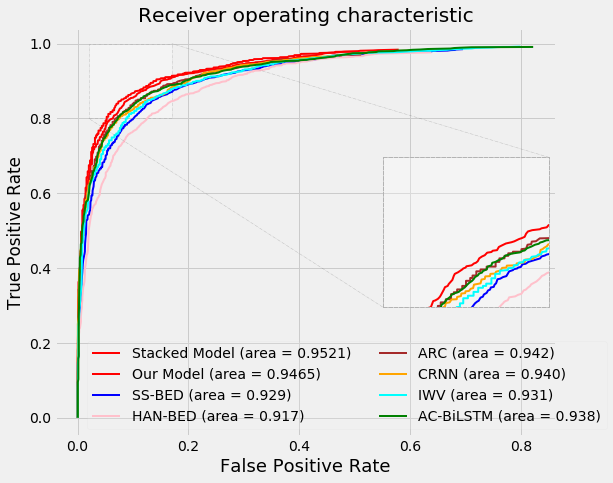

In [ ]:
fpr_stacked, tpr_stacked = fprs_stacked[0], tprs_stacked[0]
fpr_our, tpr_our = fprs_our[0], tprs_our[0]
fpr_ssbed, tpr_ssbed = fprs_ssbed[0], tprs_ssbed[0]
fpr_han, tpr_han = fprs_han[0], tprs_han[0]
fpr_arc, tpr_arc = fprs_arc[0], tprs_arc[0]
fpr_crnn, tpr_crnn = fprs_crnn[0], tprs_crnn[0]
fpr_iwv, tpr_iwv = fprs_iwv[0], tprs_iwv[0]
fpr_acbilstm, tpr_acbilstm = fprs_acbilstm[0], tprs_acbilstm[0]

for i in range(1,5):
  fpr_stacked = list(map(add, fpr_stacked, fprs_stacked[i]))
  tpr_stacked = list(map(add, tpr_stacked, tprs_stacked[i]))
  fpr_our = list(map(add, fpr_our, fprs_our[i]))
  tpr_our = list(map(add, tpr_our, tprs_our[i]))
  fpr_ssbed = list(map(add, fpr_ssbed, fprs_ssbed[i]))
  tpr_ssbed = list(map(add, tpr_ssbed, tprs_ssbed[i]))
  fpr_han = list(map(add, fpr_han, fprs_han[i]))
  tpr_han = list(map(add, tpr_han, tprs_han[i]))
  fpr_arc = list(map(add, fpr_arc, fprs_arc[i]))
  tpr_arc = list(map(add, tpr_arc, tprs_arc[i]))
  fpr_crnn = list(map(add, fpr_crnn, fprs_crnn[i]))
  tpr_crnn = list(map(add, tpr_crnn, tprs_crnn[i]))
  fpr_iwv = list(map(add, fpr_iwv, fprs_iwv[i]))
  tpr_iwv = list(map(add, tpr_iwv, tprs_iwv[i]))
  fpr_acbilstm = list(map(add, fpr_acbilstm, fprs_acbilstm[i]))
  tpr_acbilstm = list(map(add, tpr_acbilstm, tprs_acbilstm[i]))

fpr_stacked = [round(x/5.0 ,4) for x in fpr_stacked] 
tpr_stacked = [round(x/5.0 ,4) for x in tpr_stacked] 

fpr_our = [round(x/5.0 ,4) for x in fpr_our] 
tpr_our = [round(x/5.0 ,4) for x in tpr_our]

fpr_ssbed = [round(x/5.0 ,4) for x in fpr_ssbed] 
tpr_ssbed = [round(x/5.0 ,4) for x in tpr_ssbed]

fpr_han = [round(x/5.0 ,4) for x in fpr_han] 
tpr_han = [round(x/5.0 ,4) for x in tpr_han]

fpr_arc = [round(x/5.0 ,4) for x in fpr_arc] 
tpr_arc = [round(x/5.0 ,4) for x in tpr_arc]

fpr_crnn = [round(x/5.0 ,4) for x in fpr_crnn] 
tpr_crnn = [round(x/5.0 ,4) for x in tpr_crnn]

fpr_iwv = [round(x/5.0 ,4) for x in fpr_iwv] 
tpr_iwv = [round(x/5.0 ,4) for x in tpr_iwv]

fpr_acbilstm = [round(x/5.0 ,4) for x in fpr_acbilstm] 
tpr_acbilstm = [round(x/5.0 ,4) for x in tpr_acbilstm]

auc_stacked = np.mean(aucs_stacked)
auc_our = np.mean(aucs_our)
auc_ssbed = np.mean(aucs_ssbed)
auc_han = np.mean(aucs_han)
auc_arc = np.mean(aucs_arc)
auc_crnn = np.mean(aucs_crnn)
auc_iwv = np.mean(aucs_iwv)
auc_acbilstm = np.mean(aucs_acbilstm)

fig, ax = plt.subplots(figsize=(8,7)) # create a new figure with a default 111 subplot
ax.plot(fpr_stacked, tpr_stacked, label='Stacked Model (area = %0.4f)' % auc_stacked, linewidth=2, color = 'red')
ax.plot(fpr_our, tpr_our, label='Our Model (area = %0.4f)' % auc_our, linewidth=2, color = 'red')
ax.plot(fpr_ssbed, tpr_ssbed, label='SS-BED (area = %0.3f)' % auc_ssbed, linewidth=2, color = 'blue')
ax.plot(fpr_han, tpr_han, label='HAN-BED (area = %0.3f)' % auc_han, linewidth=2, color = 'pink')
ax.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f)' % auc_arc, linewidth=2, color = 'brown')
ax.plot(fpr_crnn, tpr_crnn, label='CRNN (area = %0.3f)' % auc_crnn, linewidth=2, color = 'orange')
ax.plot(fpr_iwv, tpr_iwv, label='IWV (area = %0.3f)' % auc_iwv, linewidth=2, color = 'cyan')
ax.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM (area = %0.3f)' % auc_acbilstm, linewidth=2, color = 'green')
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc='lower left',  ncol = 2,bbox_to_anchor=(0.05, 0.0, 0.0, 0.0),framealpha= 0.2)

axins = zoomed_inset_axes(ax, 2, loc = 'center right') # zoom-factor: 2.5, location: upper-left
#axins.plot(fpr_stacked, tpr_stacked, label='Stacked Model (area = %0.3f)' % auc_stacked, linewidth=2, color = 'red')
axins.plot(fpr_our, tpr_our, label='Our Model (area = %0.3f)' % auc_our, linewidth=2, color = 'red')
axins.plot(fpr_ssbed, tpr_ssbed, label='SS-BED Model (area = %0.3f)' % auc_ssbed, linewidth=2, color = 'blue')
axins.plot(fpr_han, tpr_han, label='HAN-BED Model (area = %0.3f)' % auc_han, linewidth=2, color = 'pink')
axins.plot(fpr_arc, tpr_arc, label='ARC Model (area = %0.3f)' % auc_arc, linewidth=2, color = 'brown')
axins.plot(fpr_crnn, tpr_crnn, label='CRNN Model (area = %0.3f)' % auc_crnn, linewidth=2, color = 'orange')
axins.plot(fpr_iwv, tpr_iwv, label='IWV Model (area = %0.3f)' % auc_iwv, linewidth=2, color = 'cyan')
axins.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM Model (area = %0.3f)' % auc_acbilstm, linewidth=2, color = 'green')

axins.patch.set_facecolor('white')
axins.patch.set_alpha(0.3)

axins.spines['bottom'].set_color('0.7')
axins.spines['bottom'].set_linewidth('1')
axins.spines['bottom'].set_linestyle('--')
axins.spines['top'].set_color('0.7')
axins.spines['top'].set_linewidth('1')
axins.spines['top'].set_linestyle('--')
axins.spines['right'].set_color('0.7')
axins.spines['right'].set_linewidth('1')
axins.spines['right'].set_linestyle('--')
axins.spines['left'].set_color('0.7')
axins.spines['left'].set_linewidth('1') 
axins.spines['left'].set_linestyle('--')  

x1, x2, y1, y2 = 0.02, 0.17, 0.8, 1 # specify the limits
#x1, x2, y1, y2 = 0.2, 0.5, 0.6, 0.9 # specify the limits

axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)
plt.grid(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=3, fc="white", ec="0.3", alpha = 0.3, ls = '-.')

#plt.savefig(path+ 'Self_Driver-AUC.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.1)

In [ ]:
a = [[1,2,3],[4,5,6]]
list(map(add,a[0],a[1]))

# Seperate Fold Runs

## Splitting dataset into 5 folds and saving them

In [ ]:
seed =123
path = '/content/drive/My Drive/app/Datasets/'

#path = 'drive/app/Datasets/'
#path = 'drive/app/Datasets/dataset-amazon/'
#path = 'drive/app/Datasets/Tweets/'
#dataset_name = 'Kindle_Store_5'
#dataset_name = 'Apps_for_Android_5'
#dataset_name = 'Movies_and_TV_5'
#dataset_name = 'Electronics_5'
dataset_name = 'CDs_and_Vinyl_5'
#dataset_name = 'clean_tweet'
#dataset_name = 't4sa'

csv = path+ dataset_name + '.csv'
#my_df = pd.read_csv(csv)

'''
############ Polarity Detection
my_df = my_df[my_df.rate != 3]
my_df['rate'] = my_df['rate'].replace(2, 0)
my_df['rate'] = my_df['rate'].replace(1, 0)
my_df['rate'] = my_df['rate'].replace(5, 1)
my_df['rate'] = my_df['rate'].replace(4, 1)
#my_df['rate'] = my_df['rate'].replace(3, 1)
'''
'''
############ Subjectivity detection 
my_df['rate'] = my_df['rate'].replace(2, 1)
my_df['rate'] = my_df['rate'].replace(5, 1)
my_df['rate'] = my_df['rate'].replace(4, 1)
my_df['rate'] = my_df['rate'].replace(3, 0)


#print(len(my_df[my_df.rate == 1]), my_df[my_df.rate == 0])
df_majority = my_df[my_df.rate==1]
df_minority = my_df[my_df.rate==0]

print('Training class distributions summary: {}'.format(Counter(my_df.rate)))
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.text=df_downsampled.text.astype(str)
print('Training class distributions summary: {}'.format(Counter(df_downsampled.rate)))

x = df_downsampled.text
y = df_downsampled.rate
'''
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
x = x.reset_index(drop = True)
y = y.reset_index(drop = True)
i = 0
dfs_train, dfs_test = [],[]
for train, test in kfold.split(x, y):
  
  print('Fold ', str(i+1))
  print('##########################')  
  x_train, y_train,  = x[train], y[train]
  x_test, y_test,  = x[test], y[test]
  
  Data = {'x':x_train, 'y':y_train}
  df = pd.DataFrame(Data)
  dfs_train.append(df)  
  
  Data = {'x':x_test, 'y':y_test}
  df = pd.DataFrame(Data)
  dfs_test.append(df)  
  
  i += 1
  
min_len = len(dfs_train[0])
max_len = len(dfs_train[4])
i=1
for d in dfs_train:
  while len(d) > min_len:
    d.drop(d.tail(1).index,inplace=True)
    d.drop(d.head(1).index,inplace=True) 
  d.to_csv(path+ dataset_name+'train_'+str(i)+'.csv')
  i+=1
min_len = len(dfs_test[0])
max_len = len(dfs_test[4])
i=1
for d in dfs_test:
  while len(d) > min_len:
    d.drop(d.tail(1).index,inplace=True)
    d.drop(d.head(1).index,inplace=True) 
  d.to_csv(path+ dataset_name+'test_'+str(i)+'.csv')
  i+=1

  

Fold  1
##########################
Fold  2
##########################
Fold  3
##########################
Fold  4
##########################
Fold  5
##########################


## Loading folds seperately

In [ ]:
#path = 'drive/app/Datasets/'
path = '/content/drive/My Drive/app/Datasets/'

#path = 'drive/app/Datasets/dataset-amazon/'
#path = 'drive/app/Datasets/Tweets/'
#dataset_name = 'clean_tweet'
dataset_name = 'Apps_for_Android_5'
#dataset_name = 'Kindle_Store_5'
#dataset_name = 'Movies_and_TV_5'
#dataset_name = 'Electronics_5'
#dataset_name = 'CDs_and_Vinyl_5'


#path = 'drive/app/Datasets/Tweets/'
#dataset_name = 't4sa'


fold_number = 5

csv = path+ dataset_name+ 'train_'+str(fold_number)+ '.csv'
my_df = pd.read_csv(csv)

x_train, y_train = my_df.x, my_df.y

csv = path+ dataset_name+ 'test_'+str(fold_number)+ '.csv'
my_df = pd.read_csv(csv)

x_test, y_test = my_df.x, my_df.y

#Creating dummy dataframes for saving results in
'''col = ['yhats_ssbed', 'fpr_ssbed','tpr_ssbed','roc_auc_ssbed',\
       'yhats_our','fpr_our','tpr_our','roc_auc_our',\
       'yhats_han','fpr_han','tpr_han','roc_auc_han',\
       'yhats_arc','fpr_arc','tpr_arc','roc_auc_arc',\
       'yhats_crnn','fpr_crnn','tpr_crnn','roc_auc_crnn',\
       'yhats_iwv','fpr_iwv','tpr_iwv','roc_auc_iwv',\
       'yhats_acbilstm','fpr_acbilstm','tpr_acbilstm','roc_auc_acbilstm',\
       'yhats_stacked','fpr_stacked','tpr_stacked','roc_auc_stacked']'''
col = ['yhats_our','fpr_our','tpr_our','roc_auc_our']
#df = pd.DataFrame(columns=col)
#df.to_csv(path+ dataset_name+ '_results'+ '.csv',index=False)

In [ ]:
#fold_number
#results = pd.read_csv(csv)
#len(max(sequences, key = lambda i: len(i)))
csv = path+ dataset_name+ '_results'+ '.csv'
results = pd.read_csv(csv)
results
#fold_number

,yhats_our,fpr_our,tpr_our,roc_auc_our
0,"[[0.2387249916791916], [0.9774684309959412], [...","[0.0, 0.0, 0.0, 5.389673385792821e-05, 5.38967...","[0.0, 5.389673385792821e-05, 0.003826668103912...",0.958700
1,"[[0.89593106508255], [0.4267564117908478], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.38996388...","[0.0, 5.389963887241955e-05, 0.006360157386945...",0.953478
2,"[[0.9941572546958923], [0.9038531184196472], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 5.389963887241955e-05, 0.002263784832641...",0.954860
3,"[[0.9192284345626831], [9.358298848383129e-05]...","[0.0, 0.0, 0.0, 5.389963887241955e-05, 5.38996...","[0.0, 5.389963887241955e-05, 0.000916293860831...",0.958558
4,"[[0.996709942817688], [0.8867532014846802], [0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 5.389963887241955e-05, 0.019188271438581...",0.949959


In [ ]:
max_len = 100
bs = 2048
ep = 15
embedding_dim = 100
Epoch_time = time.time()
csv = path+ dataset_name+ '_results'+ '.csv'
early_stop = EarlyStopping(monitor = "val_acc", mode = "max", patience = 3)
results = pd.read_csv(csv)
print('Loading Results Complete!')

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train.astype(str))
print('tokenizer fitted!')

embedding_matrix = create_embedding_matrix('drive/app/glove.twitter.27B.100d.txt',tokenizer.word_index, embedding_dim)
embedding_matrix_glove = create_embedding_matrix('drive/app/gensim_glove_vectors_100.txt',tokenizer.word_index, embedding_dim)
print('Embeddings creadted!')

sequences_test = tokenizer.texts_to_sequences(x_test.astype(str))
x_test_seq = pad_sequences(sequences_test, maxlen=max_len)

sequences = tokenizer.texts_to_sequences(x_train.astype(str))
x_train_seq = pad_sequences(sequences, maxlen= max_len)

###################### SS-BED ################################################
'''start_time = time.time()
file_path = path + "ssbed.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model_ssbed = build_SSBED(embedding_matrix_glove)
model_ssbed.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
print('SS-BED Model Fitted!')

yhat_ssbed = model_ssbed.predict(x_test_seq)
print('SS-BED Model Predicted!')

fpr_ssbed, tpr_ssbed, threshold = roc_curve(y_test, yhat_ssbed)
roc_auc_ssbed = auc(fpr_ssbed, tpr_ssbed)

print('SS-BED Model Completed!')
end_time = time.time()
print('SS-BED execution time = ', str(round(end_time - start_time, 2)))'''
######################## Paper 2 ###############################################
start_time = time.time()
x_train_seq_exp = np.expand_dims(x_train_seq, axis=1)
y_train_exp = np.expand_dims(y_train, axis=1)
x_test_seq_exp = np.expand_dims(x_test_seq, axis=1)
y_test_exp = np.expand_dims(y_test, axis=1)

file_path = path + "Paper_2.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_our = Paper_2_doc_branch(max_len, embeddingSize = 100, embWeights = embedding_matrix_glove, vocabSize = embedding_matrix.shape[0])
model_our.fit([x_train_seq , x_train_seq_exp], y_train_exp, batch_size=bs, epochs=ep, validation_split = 0.2, callbacks = [checkpoint,early_stop])

##model_our.fit([x_train_seq , x_train_seq_exp], [y_train_exp,y_train_exp,y_train_exp], batch_size=bs, epochs=ep, validation_split = 0.2, callbacks = [checkpoint,early_stop])

doc_results = model_our.predict([x_test_seq,x_test_seq_exp])
print('Paper_2_doc_branch Model Fitted!')

checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_our = Paper_2_sent_branch(max_len, embeddingSize = 100, embWeights = embedding_matrix_glove, vocabSize = embedding_matrix.shape[0])
model_our.fit(x_train_seq_exp, y_train_exp, batch_size=bs, epochs=ep, validation_split = 0.2, callbacks = [checkpoint,early_stop])

sent_results = model_our.predict(x_test_seq_exp)
print('Paper_2_sent_branch Model Fitted!')

checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_our = Paper_2_word_branch(max_len, embeddingSize = 100, embWeights = embedding_matrix_glove, vocabSize = embedding_matrix.shape[0])
model_our.fit(x_train_seq, y_train_exp, batch_size=bs, epochs=ep, validation_split = 0.2, callbacks = [checkpoint,early_stop])
word_results = model_our.predict(x_test_seq)
print('Paper_2_doc_branch Model Fitted!')

yhat_our = np.concatenate([[word_results],[sent_results],[doc_results]])
#yhat_our = sent_results
############################## Late Fusion #####################################
################################################################################
#yhat_our = np.amax(yhat_our,axis=0)
#yhat_our_DS = yhat_our
#yhat_our = np.average(yhat_our,axis=0) 
yhat_our = np.prod(yhat_our,axis=0)
#best = np.argmax([word_results[3][0],sent_results[3][0],doc_results[3][0]])
#yhat_our = yhat_our[best]
############################## ############### #################################
################################################################################

print('Paper_2 Model Predicted!')  


fpr_our, tpr_our, threshold = roc_curve(y_test_exp, yhat_our)
roc_auc_our = auc(fpr_our, tpr_our)

print('Paper_2 Model Completed!')
end_time = time.time()
print('Paper_2 execution time = ', str(round(end_time - start_time, 2)))

######################## Our Model ###########################################
'''start_time = time.time()
file_path = path + "our.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_our = Paper_2(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1 = 4, kernel_size2 = 6, dense_units = 64, dr = 0.2, conv_size = 32)
model_our.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
print('Our Model Fitted!')

yhat_our = model_our.predict(x_test_seq) 
print('Our Model Predicted!')

fpr_our, tpr_our, threshold = roc_curve(y_test, yhat_our)
roc_auc_our = auc(fpr_our, tpr_our)

print('Our Model Completed!')
end_time = time.time()
print('Our execution time = ', str(round(end_time - start_time, 2)))
'''
########################### HAN ##############################################
'''start_time = time.time()
x_train_seq_exp = np.expand_dims(x_train_seq, axis=1)
y_train_exp = np.expand_dims(y_train, axis=1)
x_test_seq_exp = np.expand_dims(x_test_seq, axis=1)
y_test_exp = np.expand_dims(y_test, axis=1)

file_path = path + "HAN.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_han = build_HAN()
model_han.fit(x_train_seq_exp, y_train_exp, batch_size=bs, epochs=ep, validation_split = 0.2, callbacks = [checkpoint,early_stop])
print('HAN Model Fitted!')

yhat_han = model_han.predict(x_test_seq_exp)
 
print('HAN Model Predicted!')  

fpr_han, tpr_han, threshold = roc_curve(y_test_exp, yhat_han)
roc_auc_han = auc(fpr_han, tpr_han)

print('HAN Model Completed!')
end_time = time.time()
print('HAN execution time = ', str(round(end_time - start_time, 2)))'''
########################## ARC ############################################
'''start_time = time.time()
file_path = path + "ARC.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_arc = build_ARC(embedding_matrix)
model_arc.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
print('ARC Model Fitted!')

yhat_arc = model_arc.predict(x_test_seq)  
print('ARC Model Predicted!')

fpr_arc, tpr_arc, threshold = roc_curve(y_test, yhat_arc)
roc_auc_arc = auc(fpr_arc, tpr_arc)

print('ARC Model Completed!')
end_time = time.time()
print('ARC execution time = ', str(round(end_time - start_time, 2)))'''
########################## CRNN ############################################
'''start_time = time.time()
file_path = path + "CRNN.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_crnn = build_CRNN(embedding_matrix)
model_crnn.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
print('CRNN Model Fitted!')

yhat_crnn = model_crnn.predict(x_test_seq) 
print('CRNN Model Predicted!')

fpr_crnn, tpr_crnn, threshold = roc_curve(y_test, yhat_crnn)
roc_auc_crnn = auc(fpr_crnn, tpr_crnn)

print('CRNN Model Completed!')  
end_time = time.time()
print('CRNN execution time = ', str(round(end_time - start_time, 2)))'''
########################## IWV ############################################
'''start_time = time.time()
file_path = path + "IWV.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_iwv = build_IWV(embedding_matrix)
model_iwv.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
print('IWV Model Fitted!')

yhat_iwv = model_iwv.predict(x_test_seq)
print('IWV Model Predicted!')

fpr_iwv, tpr_iwv, threshold = roc_curve(y_test, yhat_iwv)
roc_auc_iwv = auc(fpr_iwv, tpr_iwv)
print('IWV Model Completed!')

end_time = time.time()
print('IWV execution time = ', str(round(end_time - start_time, 2)))'''
########################## AC-BiLSTM ############################################
'''start_time = time.time()
file_path = path + "AC_BiLSTM.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_acbilstm = build_ACBiLSTM(embedding_matrix)
model_acbilstm.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
print('AC-BiLSTM Model Fitted!')

yhat_acbilstm = model_acbilstm.predict(x_test_seq)
print('AC_BiLSTM Model Predicted!')

fpr_acbilstm, tpr_acbilstm, threshold = roc_curve(y_test, yhat_acbilstm)
roc_auc_acbilstm = auc(fpr_acbilstm, tpr_acbilstm)
print('AC_BiLSTM Model Completed!')

end_time = time.time()
print('AC_BiLSTM execution time = ', str(round(end_time - start_time, 2)))'''
############## Stacked Model #################################################
'''start_time = time.time()
members = [model_our, model_ssbed, model_arc, model_crnn, model_iwv,model_acbilstm]
model_stacked = fit_stacked_model(members, x_test_seq, y_test)
yhat_stacked = stacked_prediction(members, model_stacked, x_test_seq)
#yhats_stacked.append(yhat_stacked[:,1])  
print('Stacked Model Predicted!')

fpr_stacked, tpr_stacked, threshold = roc_curve(y_test, yhat_stacked[:,1])
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
print('Stacked Model Completed!')

end_time = time.time()
print('Stacked execution time = ', str(round(end_time - start_time, 2)))'''
##############################################################################
'''results.loc[str(fold_number)] = [yhat_ssbed.tolist(),fpr_ssbed.tolist(),tpr_ssbed.tolist(),roc_auc_ssbed.tolist(),\
                                 yhat_our.tolist(),fpr_our.tolist(),tpr_our.tolist(),roc_auc_our.tolist(),\
                                 yhat_han.tolist(),fpr_han.tolist(),tpr_han.tolist(),roc_auc_han.tolist(),\
                                 yhat_arc.tolist(),fpr_arc.tolist(),tpr_arc.tolist(),roc_auc_arc.tolist(),\
                                 yhat_crnn.tolist(),fpr_crnn.tolist(),tpr_crnn.tolist(),roc_auc_crnn.tolist(),\
                                 yhat_iwv.tolist(),fpr_iwv.tolist(),tpr_iwv.tolist(),roc_auc_iwv.tolist(),\
                                 yhat_acbilstm.tolist(),fpr_acbilstm.tolist(),tpr_acbilstm.tolist(),roc_auc_acbilstm.tolist(),\
                                 yhat_stacked[:,1].tolist(),fpr_stacked.tolist(),tpr_stacked.tolist(),roc_auc_stacked.tolist()]'''
                        
results.loc[str(fold_number)] = [yhat_our.tolist(),fpr_our.tolist(),tpr_our.tolist(),roc_auc_our.tolist()]
results.to_csv(path+ dataset_name+ '_results'+ '.csv',index=False)

End_Epoch_time = time.time()
print(str(round(End_Epoch_time - Epoch_time, 2)))

In [ ]:
#yhat_our = np.concatenate([[word_results],[sent_results],[doc_results]])
#yhat_our= np.prod(yhat_our,axis=0)
#yhat_our.shape


## Testing

In [ ]:
path = 'drive/app/Datasets/'
#path = 'drive/app/Datasets/dataset-amazon/'
#dataset_name = 'Kindle_Store_5'
#dataset_name = 'Movies_and_TV_5'
#dataset_name = 'Electronics_5'
dataset_name = 'CDs_and_Vinyl_5'
#path = 'drive/app/Datasets/Tweets/'
#dataset_name = 'Apps_for_Android_5'

col = ['y_test_1', 'y_test_2','y_test_3','y_test_4','y_test_5']
y_test_df = pd.DataFrame(columns=col)
for fold_number in range(1,6):
  csv = path+ dataset_name+ 'test_'+str(fold_number)+ '.csv'
  my_df = pd.read_csv(csv)
  y_test = my_df.y
  y_test_df['y_test_'+str(fold_number)] = y_test


In [ ]:
#yhats_ssbed = results.yhats_ssbed
yhats_our = results.yhats_our
#yhats_han = results.yhats_han
#yhats_arc = results.yhats_arc
#yhats_crnn = results.yhats_crnn
#yhats_iwv = results.yhats_iwv
#yhats_acbilstm = results.yhats_acbilstm
#yhats_stacked = results.yhats_stacked

In [ ]:

results = []
#yhat_list = [yhats_ssbed, yhats_our, yhats_han, yhats_arc, yhats_crnn, yhats_iwv, yhats_acbilstm, yhats_stacked]
yhat_list = [yhats_our]
for yh in yhat_list:
  for c,i in zip(yh,range(len(yh))):
    c = literal_eval(c)
    print(i+1)
    c = np.asarray(c, dtype=np.float32)
    labels = (c > 0.5).astype(np.int)
    labels = labels.flatten().tolist()

    data = []
    cnf_matrix = confusion_matrix(y_test_df['y_test_'+str(i+1)][:len(labels)], labels)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)


    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    F1 = (2 * TPR * PPV)/(TPR + PPV)
    data.append(TPR)
    data.append(TNR)
    data.append(PPV)
    data.append(F1)
    data.append(ACC)

    results.append([round(d[0],4) for d in data])
    results.append([round(d[1],4) for d in data])

print("Recall, Specifity, Precision, F1, Accuracy")
#for r in results:
#print(r)
#model_names = ['SS-BED','Our', 'HAN','ARC', 'CRNN', 'IWV', 'ACBiLSTM' ,'Stacked']
model_names = ['Our']
#for j in range(8):
for j in range(1):
  ssbed_pos = results[0 + j * 10]
  ssbed_neg = results[1 + j * 10]
  for i in range(2+j*10,10+j*10,2):
    ssbed_pos = list(map(add, ssbed_pos, results[i]))
    ssbed_neg = list(map(add, ssbed_neg, results[i+1]))
  ssbed_pos = [round(x / float(len(ssbed_pos)),4) for x in ssbed_pos]
  ssbed_neg = [round(x / float(len(ssbed_neg)),4) for x in ssbed_neg]

  print("Results for ",model_names[j])
  print(ssbed_pos)
  print(ssbed_neg)

1
2
3
4
5
Recall, Specifity, Precision, F1, Accuracy
Results for  Our
[0.9392, 0.7903, 0.8204, 0.8745, 0.8647]
[0.7903, 0.9392, 0.9313, 0.8526, 0.8647]


In [ ]:
yhats_our.shape[0]

5

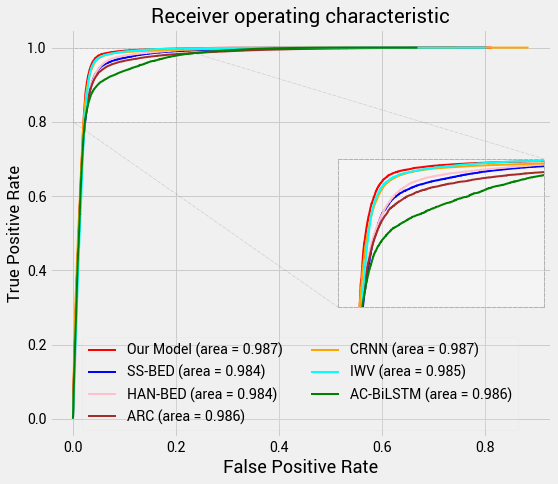

In [ ]:
fpr_stacked, tpr_stacked = literal_eval(results.fpr_stacked[0]), literal_eval(results.tpr_stacked[0])
fpr_our, tpr_our = literal_eval(results.fpr_our[0]), literal_eval(results.tpr_our[0])
fpr_ssbed, tpr_ssbed = literal_eval(results.fpr_ssbed[0]), literal_eval(results.tpr_ssbed[0])
fpr_han, tpr_han = literal_eval(results.fpr_han[0]), literal_eval(results.tpr_han[0])
fpr_arc, tpr_arc = literal_eval(results.fpr_arc[0]), literal_eval(results.tpr_arc[0])
fpr_crnn, tpr_crnn = literal_eval(results.fpr_crnn[0]), literal_eval(results.tpr_crnn[0])
fpr_iwv, tpr_iwv = literal_eval(results.fpr_iwv[0]), literal_eval(results.tpr_iwv[0])
fpr_acbilstm, tpr_acbilstm = literal_eval(results.fpr_acbilstm[0]), literal_eval(results.tpr_acbilstm[0])

for i in range(1,5):
  fpr_stacked = list(map(add, fpr_stacked, literal_eval(results.fpr_stacked[i])))
  tpr_stacked = list(map(add, tpr_stacked, literal_eval(results.tpr_stacked[i])))
  fpr_our = list(map(add, fpr_our, literal_eval(results.fpr_our[i])))
  tpr_our = list(map(add, tpr_our, literal_eval(results.tpr_our[i])))
  fpr_ssbed = list(map(add, fpr_ssbed, literal_eval(results.fpr_ssbed[i])))
  tpr_ssbed = list(map(add, tpr_ssbed, literal_eval(results.tpr_ssbed[i])))
  fpr_han = list(map(add, fpr_han, literal_eval(results.fpr_han[i])))
  tpr_han = list(map(add, tpr_han, literal_eval(results.tpr_han[i])))
  fpr_arc = list(map(add, fpr_arc, literal_eval(results.fpr_arc[i])))
  tpr_arc = list(map(add, tpr_arc,  literal_eval(results.tpr_arc[i])))
  fpr_crnn = list(map(add, fpr_crnn, literal_eval(results.fpr_crnn[i])))
  tpr_crnn = list(map(add, tpr_crnn, literal_eval(results.tpr_crnn[i])))
  fpr_iwv = list(map(add, fpr_iwv, literal_eval(results.fpr_iwv[i])))
  tpr_iwv = list(map(add, tpr_iwv, literal_eval(results.tpr_iwv[i])))
  fpr_acbilstm = list(map(add, fpr_acbilstm, literal_eval(results.fpr_acbilstm[i])))
  tpr_acbilstm = list(map(add, tpr_acbilstm, literal_eval(results.tpr_acbilstm[i])))

fpr_stacked = [round(x/5.0 ,4) for x in fpr_stacked] 
tpr_stacked = [round(x/5.0 ,4) for x in tpr_stacked] 

fpr_our = [round(x/5.0 ,4) for x in fpr_our] 
tpr_our = [round(x/5.0 ,4) for x in tpr_our]

fpr_ssbed = [round(x/5.0 ,4) for x in fpr_ssbed] 
tpr_ssbed = [round(x/5.0 ,4) for x in tpr_ssbed]

fpr_han = [round(x/5.0 ,4) for x in fpr_han] 
tpr_han = [round(x/5.0 ,4) for x in tpr_han]

fpr_arc = [round(x/5.0 ,4) for x in fpr_arc] 
tpr_arc = [round(x/5.0 ,4) for x in tpr_arc]

fpr_crnn = [round(x/5.0 ,4) for x in fpr_crnn] 
tpr_crnn = [round(x/5.0 ,4) for x in tpr_crnn]

fpr_iwv = [round(x/5.0 ,4) for x in fpr_iwv] 
tpr_iwv = [round(x/5.0 ,4) for x in tpr_iwv]

fpr_acbilstm = [round(x/5.0 ,4) for x in fpr_acbilstm] 
tpr_acbilstm = [round(x/5.0 ,4) for x in tpr_acbilstm]

aucs_stacked,aucs_our,aucs_ssbed,aucs_han,aucs_arc,aucs_crnn,aucs_iwv,aucs_acbilstm = [],[],[],[],[],[],[],[]
for i in range(5):
  aucs_stacked.append(float(results.roc_auc_stacked[i]))
  aucs_our.append(float(results.roc_auc_our[i]))
  aucs_ssbed.append(float(results.roc_auc_ssbed[i]))
  aucs_han.append(float(results.roc_auc_han[i]))
  aucs_arc.append(float(results.roc_auc_arc[i]))
  aucs_crnn.append(float(results.roc_auc_crnn[i]))
  aucs_iwv.append(float(results.roc_auc_iwv[i]))
  aucs_acbilstm.append(float(results.roc_auc_acbilstm[i]))
  
auc_stacked = np.mean(aucs_stacked)
auc_our = np.mean(aucs_our)
auc_ssbed = np.mean(aucs_ssbed)
auc_han = np.mean(aucs_han)
auc_arc = np.mean(aucs_arc)
auc_crnn = np.mean(aucs_crnn)
auc_iwv = np.mean(aucs_iwv)
auc_acbilstm = np.mean(aucs_acbilstm)

fig, ax = plt.subplots(figsize=(8,7)) # create a new figure with a default 111 subplot
#ax.plot(fpr_stacked, tpr_stacked, label='Stacked Model (area = %0.f)' % auc_stacked, linewidth=2, color = 'red')
ax.plot(fpr_our, tpr_our, label='Our Model (area = %0.3f)' % auc_our, linewidth=2, color = 'red')
ax.plot(fpr_ssbed, tpr_ssbed, label='SS-BED (area = %0.3f)' % auc_ssbed, linewidth=2, color = 'blue')
ax.plot(fpr_han, tpr_han, label='HAN-BED (area = %0.3f)' % auc_han, linewidth=2, color = 'pink')
ax.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f)' % auc_arc, linewidth=2, color = 'brown')
ax.plot(fpr_crnn, tpr_crnn, label='CRNN (area = %0.3f)' % auc_crnn, linewidth=2, color = 'orange')
ax.plot(fpr_iwv, tpr_iwv, label='IWV (area = %0.3f)' % auc_iwv, linewidth=2, color = 'cyan')
ax.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM (area = %0.3f)' % auc_acbilstm, linewidth=2, color = 'green')
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc='lower left',  ncol = 2,bbox_to_anchor=(0.05, 0.0, 0.0, 0.0),framealpha= 0.2)

axins = zoomed_inset_axes(ax, 2, loc = 'center right') # zoom-factor: 2.5, location: upper-left
#axins.plot(fpr_stacked, tpr_stacked, label='Stacked Model (area = %0.3f)' % auc_stacked, linewidth=2, color = 'red')
axins.plot(fpr_our, tpr_our, label='Our Model (area = %0.3f)' % auc_our, linewidth=2, color = 'red')
axins.plot(fpr_ssbed, tpr_ssbed, label='SS-BED Model (area = %0.3f)' % auc_ssbed, linewidth=2, color = 'blue')
axins.plot(fpr_han, tpr_han, label='HAN-BED Model (area = %0.3f)' % auc_han, linewidth=2, color = 'pink')
axins.plot(fpr_arc, tpr_arc, label='ARC Model (area = %0.3f)' % auc_arc, linewidth=2, color = 'brown')
axins.plot(fpr_crnn, tpr_crnn, label='CRNN Model (area = %0.3f)' % auc_crnn, linewidth=2, color = 'orange')
axins.plot(fpr_iwv, tpr_iwv, label='IWV Model (area = %0.3f)' % auc_iwv, linewidth=2, color = 'cyan')
axins.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM Model (area = %0.3f)' % auc_acbilstm, linewidth=2, color = 'green')

axins.patch.set_facecolor('white')
axins.patch.set_alpha(0.3)

axins.spines['bottom'].set_color('0.7')
axins.spines['bottom'].set_linewidth('1')
axins.spines['bottom'].set_linestyle('--')
axins.spines['top'].set_color('0.7')
axins.spines['top'].set_linewidth('1')
axins.spines['top'].set_linestyle('--')
axins.spines['right'].set_color('0.7')
axins.spines['right'].set_linewidth('1')
axins.spines['right'].set_linestyle('--')
axins.spines['left'].set_color('0.7')
axins.spines['left'].set_linewidth('1') 
axins.spines['left'].set_linestyle('--')  

x1, x2, y1, y2 = 0.0, 0.2, 0.8, 1 # specify the limits
#x1, x2, y1, y2 = 0.2, 0.5, 0.6, 0.9 # specify the limits

axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)
plt.grid(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=3, fc="white", ec="0.3", alpha = 0.3, ls = '-.')

plt.savefig(path+ 't4sa-AUC.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.1)

In [ ]:
path+ dataset_name

'drive/app/Datasets/Tweets/clean_tweet'